<a href="https://colab.research.google.com/github/tamrakarmegha01/Sentiment-analysis-of-approval-of-covaxinfor-children-in-India-using-tweepy/blob/main/children_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-twitter 

     |████████████████████████████████| 67 kB 2.7 MB/s 


In [ ]:
!pip install pycountry

     |████████████████████████████████| 10.1 MB 5.4 MB/s 
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595784 sha256=88048abc122250ec38457d8f5cceedba5c76800b6108064f09127db370403df3
  Stored in directory: /root/.cache/pip/wheels/f7/8f/9c/b070d7376caf2beb0685bf72578106b2fd57019ed57d84f126
Successfully built pycountry


In [ ]:
!pip install requests


In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 6.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=4e7c8f2f6792aa4189b616c3ba78ec6bca44a16ba80237f5398c9ae50fc4dff7
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string 
import tweepy

from wordcloud import WordCloud,STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import tweepy

MAX_TWEETS = 5000000000000000000000


In [ ]:
consumerKey = "##################"
consumerSecret = "##################"
accessToken = "##################"
accessTokenSecret = "##################"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)


In [ ]:
df = pd.DataFrame(columns=['text', 'source', 'url'])
msgs = []
msg =[]

for tweet in tweepy.Cursor(api.search, q='#bmw', rpp=100).items(10):
    msg = [tweet.text, tweet.source, tweet.source_url] 
    msg = tuple(msg)                    
    msgs.append(msg)

df = pd.DataFrame(msgs)

In [ ]:
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

#keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("please enter how many tweets to analyze: "))

positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

#startDate = datetime.datetime(2020, 10, 12)
#endDate =   datetime.datetime(2021, 10, 13)

tweets = tweepy.Cursor(api.search, q="#Covaxin OR #covaxinforchildren", lang="en", since="2021-10-11", until="2021-10-13").items(noOfTweet)

for tweet in tweets:
  #if tweet.created_at < endDate and tweet.created_at > startDate: 
      #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
      
    if neg > pos:
      negative_list.append(tweet.text)
      negative += 1

    elif pos > neg:
      positive_list.append(tweet.text)
      positive += 1
      
    elif pos == neg:
      neutral_list.append(tweet.text)
      neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

please enter how many tweets to analyze: 3200


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))


total number:  3200
positive number:  2258
negative number:  164
neutral number:  778


In [ ]:
tweet_list

,0
0,RT @RShivshankar: Big feather in the 'Make In ...
1,RT @Dharma2X: Bharat Biotech's #Covaxin gets e...
2,RT @KA1DEN9: The one thing Biden could do righ...
3,The one thing Biden could do right is bring #C...
4,RT @RShivshankar: Big feather in the 'Make In ...
...,...
3195,RT @GorwayGlobal: @BharatBiotech @CDSCO_INDIA_...
3196,RT @SharmaKhemchand: Congratulations India!\n\...
3197,RT @Sunil_Deodhar: Congratulations to our Scie...
3198,RT @me_locket: #COVAXIN vaccine approved for c...


In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(tweet_list)

                                                      0
0     RT @RShivshankar: Big feather in the 'Make In ...
1     RT @Dharma2X: Bharat Biotech's #Covaxin gets e...
2     RT @KA1DEN9: The one thing Biden could do righ...
3     The one thing Biden could do right is bring #C...
4     RT @RShivshankar: Big feather in the 'Make In ...
5     @coffeedude9 No way my kiddo getting that crap...
6     RT @DNeurosx: Approval of #COVAXIN for 2-18 ye...
7     RT @blsanthosh: #COVAXIN vaccine approved for ...
8     RT @PMuralidharRao: #Covaxin will be soon avai...
9     RT @sumanthraman: No other Covid vaccine is ap...
10    RT @Dharma2X: Bharat Biotech's #Covaxin gets e...
11    RT @blsanthosh: #COVAXIN vaccine approved for ...
12    RT @chanda_mahua: Thank God \n#CovaxinForKids ...
13    RT @Sunil_Deodhar: Congratulations to our Scie...
14    RT @ashishsood_bjp: The #MadeInIndia Covid Vac...
15    RT @Sunil_Deodhar: Congratulations to our Scie...
16    RT @Dharma2X: Bharat Biotech's #Covaxin ge

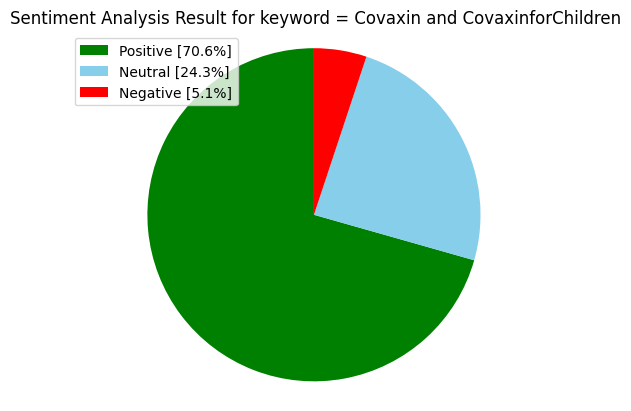

In [ ]:
#piechart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'skyblue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword = Covaxin and CovaxinforChildren" )
plt.axis('equal')
plt.show()

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @RShivshankar: Big feather in the 'Make In ...,RT @RShivshankar: Big feather in the 'Make In ...
1,RT @Dharma2X: Bharat Biotech's #Covaxin gets e...,RT @Dharma2X: Bharat Biotech's #Covaxin gets e...
2,RT @KA1DEN9: The one thing Biden could do righ...,RT @KA1DEN9: The one thing Biden could do righ...
3,The one thing Biden could do right is bring #C...,The one thing Biden could do right is bring #C...
4,RT @RShivshankar: Big feather in the 'Make In ...,RT @RShivshankar: Big feather in the 'Make In ...
...,...,...
3195,RT @GorwayGlobal: @BharatBiotech @CDSCO_INDIA_...,RT @GorwayGlobal: @BharatBiotech @CDSCO_INDIA_...
3196,RT @SharmaKhemchand: Congratulations India!\n\...,RT @SharmaKhemchand: Congratulations India!\n\...
3197,RT @Sunil_Deodhar: Congratulations to our Scie...,RT @Sunil_Deodhar: Congratulations to our Scie...
3198,RT @me_locket: #COVAXIN vaccine approved for c...,RT @me_locket: #COVAXIN vaccine approved for c...


In [ ]:
tweet_list

,0,text
0,RT @RShivshankar: Big feather in the 'Make In ...,RT @RShivshankar: Big feather in the 'Make In ...
1,RT @Dharma2X: Bharat Biotech's #Covaxin gets e...,RT @Dharma2X: Bharat Biotech's #Covaxin gets e...
2,RT @KA1DEN9: The one thing Biden could do righ...,RT @KA1DEN9: The one thing Biden could do righ...
3,The one thing Biden could do right is bring #C...,The one thing Biden could do right is bring #C...
4,RT @RShivshankar: Big feather in the 'Make In ...,RT @RShivshankar: Big feather in the 'Make In ...
...,...,...
3195,RT @GorwayGlobal: @BharatBiotech @CDSCO_INDIA_...,RT @GorwayGlobal: @BharatBiotech @CDSCO_INDIA_...
3196,RT @SharmaKhemchand: Congratulations India!\n\...,RT @SharmaKhemchand: Congratulations India!\n\...
3197,RT @Sunil_Deodhar: Congratulations to our Scie...,RT @Sunil_Deodhar: Congratulations to our Scie...
3198,RT @me_locket: #COVAXIN vaccine approved for c...,RT @me_locket: #COVAXIN vaccine approved for c...


In [ ]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)


,0,text
0,RT @RShivshankar: Big feather in the 'Make In ...,big feather in the make in india cap indig...
1,RT @Dharma2X: Bharat Biotech's #Covaxin gets e...,bharat biotech s covaxin gets emergency appr...
2,RT @KA1DEN9: The one thing Biden could do righ...,the one thing biden could do right is bring ...
3,The one thing Biden could do right is bring #C...,the one thing biden could do right is bring c...
4,RT @RShivshankar: Big feather in the 'Make In ...,big feather in the make in india cap indig...
5,@coffeedude9 No way my kiddo getting that crap...,no way my kiddo getting that crap only cova...
6,RT @DNeurosx: Approval of #COVAXIN for 2-18 ye...,approval of covaxin for 2 18 years age group...
7,RT @blsanthosh: #COVAXIN vaccine approved for ...,covaxin vaccine approved for children aged 2...
8,RT @PMuralidharRao: #Covaxin will be soon avai...,covaxin will be soon available for children ...
9,RT @sumanthraman: No other Covid vaccine is ap...,no other covid vaccine is approved for chidre...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
    
tw_list.head(10)



,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @RShivshankar: Big feather in the 'Make In ...,big feather in the make in india cap indig...,0.000000,0.100000,neutral,0.000,1.000,0.000,0.0000
1,RT @Dharma2X: Bharat Biotech's #Covaxin gets e...,bharat biotech s covaxin gets emergency appr...,0.233333,0.500000,positive,0.100,0.538,0.362,0.7783
2,RT @KA1DEN9: The one thing Biden could do righ...,the one thing biden could do right is bring ...,0.285714,0.535714,positive,0.000,0.833,0.167,0.4215
3,The one thing Biden could do right is bring #C...,the one thing biden could do right is bring c...,0.285714,0.535714,positive,0.000,0.833,0.167,0.4215
4,RT @RShivshankar: Big feather in the 'Make In ...,big feather in the make in india cap indig...,0.000000,0.100000,neutral,0.000,1.000,0.000,0.0000
5,@coffeedude9 No way my kiddo getting that crap...,no way my kiddo getting that crap only cova...,-0.400000,0.900000,negative,0.324,0.676,0.000,-0.5859
6,RT @DNeurosx: Approval of #COVAXIN for 2-18 ye...,approval of covaxin for 2 18 years age group...,0.000000,0.000000,positive,0.000,0.866,0.134,0.4767
7,RT @blsanthosh: #COVAXIN vaccine approved for ...,covaxin vaccine approved for children aged 2...,-0.100000,0.400000,positive,0.000,0.726,0.274,0.5994
8,RT @PMuralidharRao: #Covaxin will be soon avai...,covaxin will be soon available for children ...,0.266667,0.466667,positive,0.000,0.758,0.242,0.6249
9,RT @sumanthraman: No other Covid vaccine is ap...,no other covid vaccine is approved for chidre...,0.054167,0.558333,positive,0.088,0.800,0.112,0.1531


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,2304,72.00
neutral,669,20.91
negative,227,7.09


In [ ]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [ ]:
from google.colab import files
uploaded=files.upload()

Word Cloud Saved Successfully


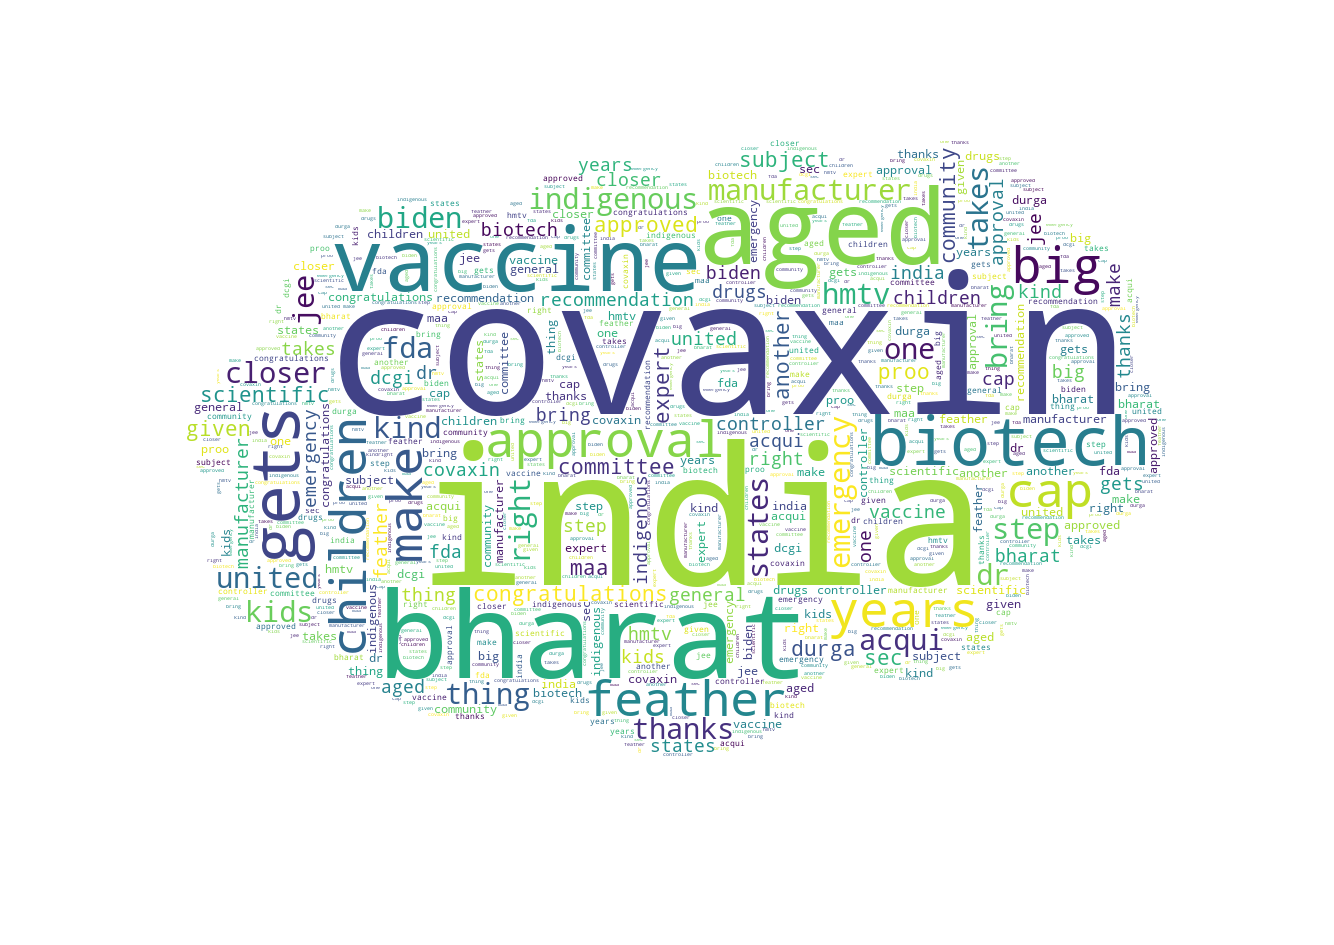

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


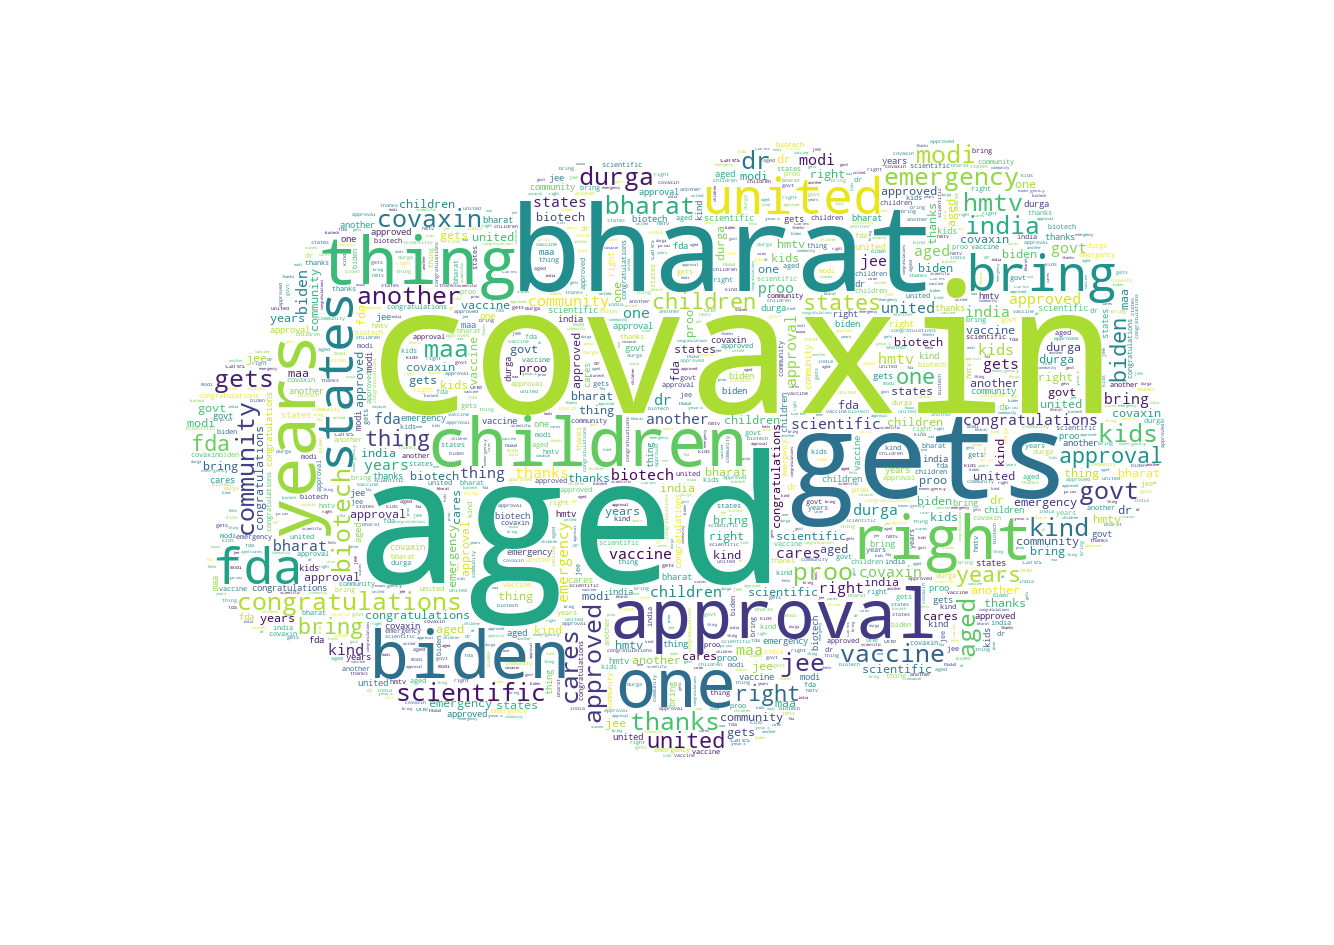

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


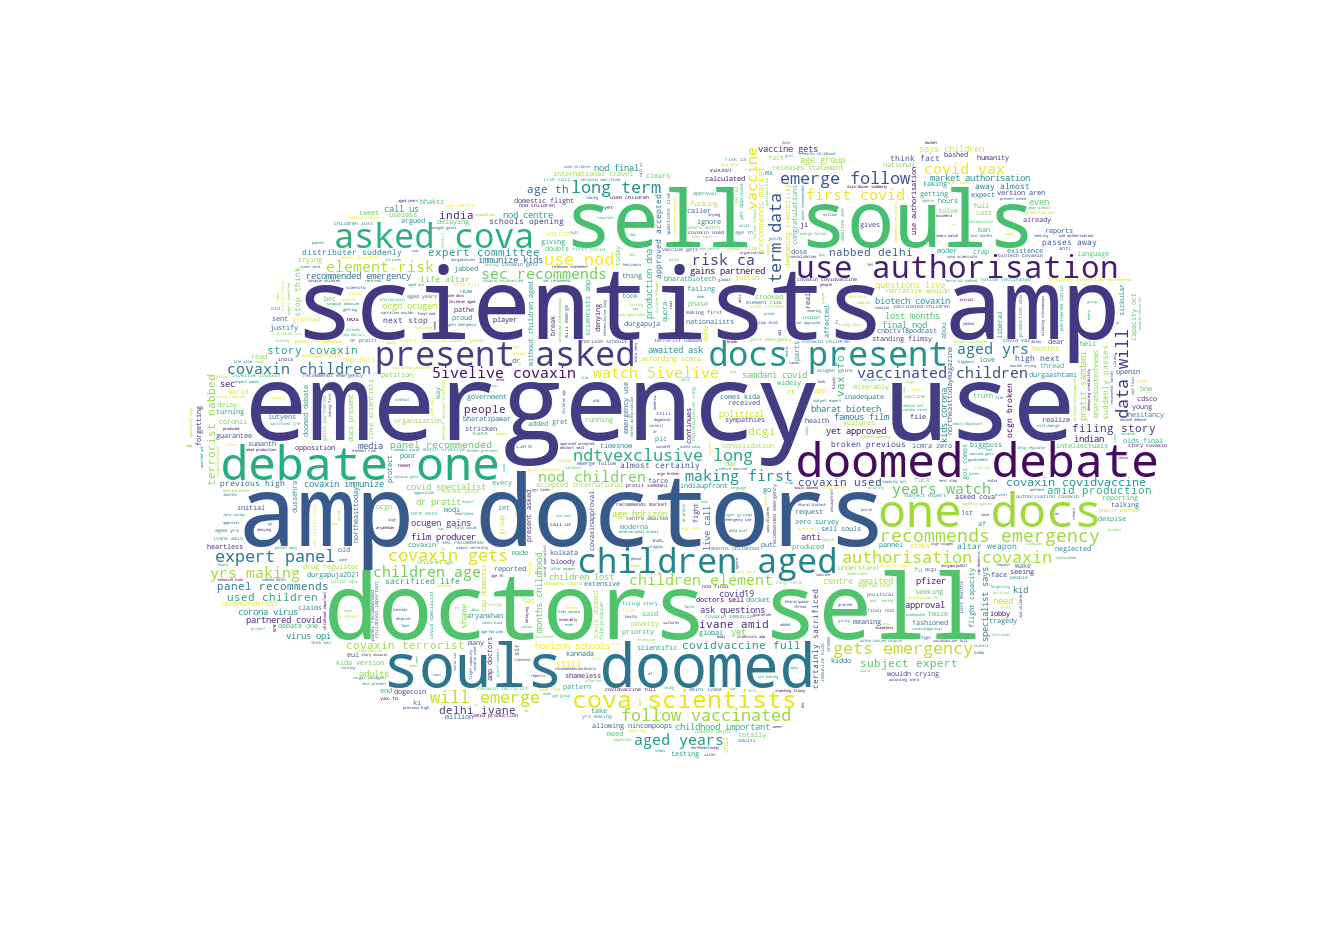

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


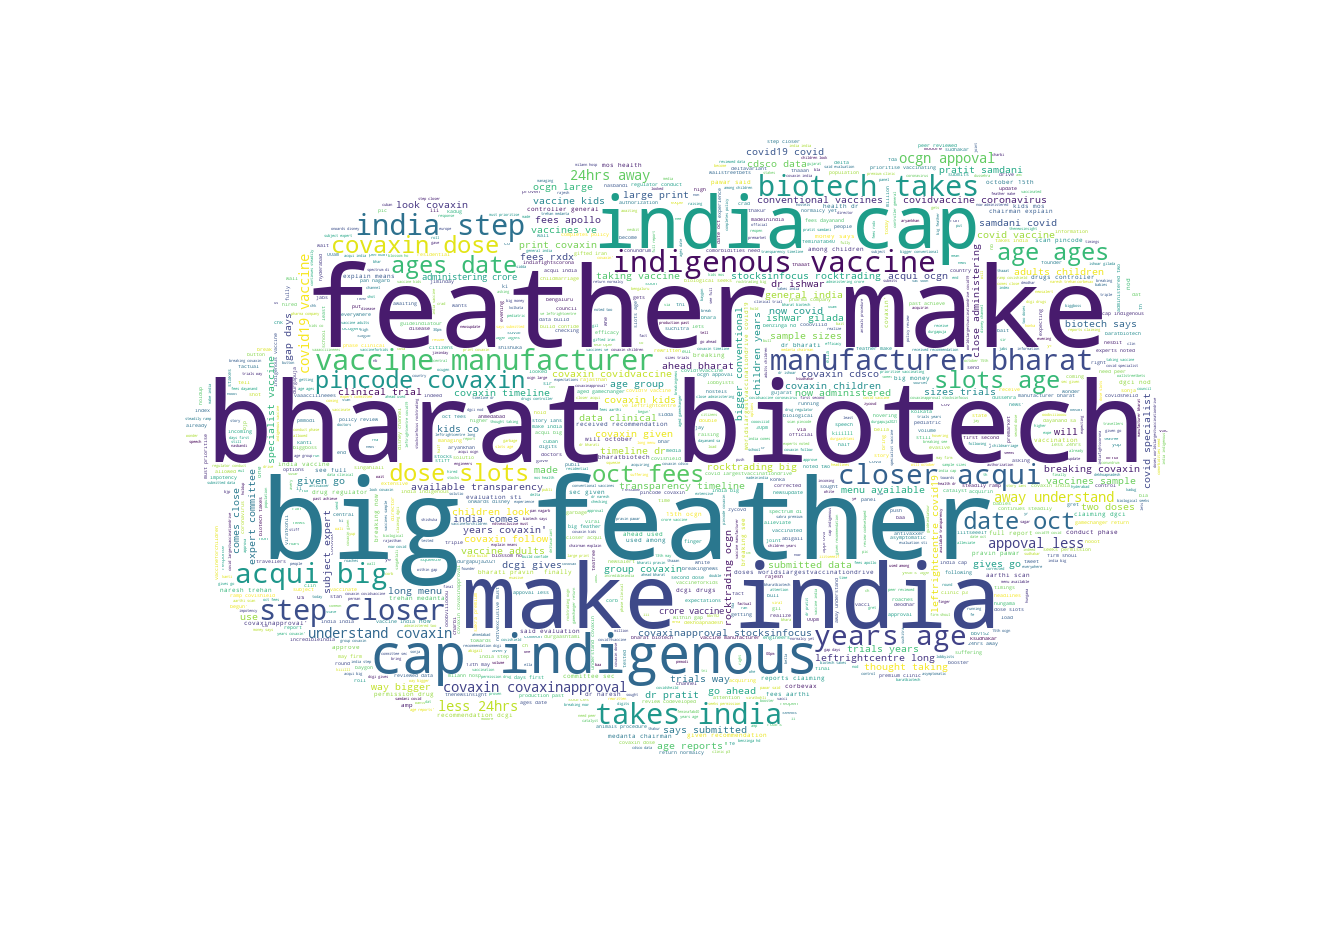

In [ ]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [ ]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,119.25
neutral,111.21
positive,113.44


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,20.74
neutral,17.73
positive,17.53


In [ ]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [ ]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [ ]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
tw_list.head()


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @RShivshankar: Big feather in the 'Make In ...,big feather in the make in india cap indig...,0.000000,0.100000,neutral,0.0,1.000,0.000,0.0000,123,20,big feather in the make in india cap indig...,"[, big, feather, in, the, make, in, india, cap...","[, big, feather, make, india, cap, indigenous,...","[, big, feather, make, india, cap, indigen, va..."
1,RT @Dharma2X: Bharat Biotech's #Covaxin gets e...,bharat biotech s covaxin gets emergency appr...,0.233333,0.500000,positive,0.1,0.538,0.362,0.7783,120,20,bharat biotech s covaxin gets emergency appr...,"[, bharat, biotech, s, covaxin, gets, emergenc...","[, bharat, biotech, covaxin, gets, emergency, ...","[, bharat, biotech, covaxin, get, emerg, appro..."
2,RT @KA1DEN9: The one thing Biden could do righ...,the one thing biden could do right is bring ...,0.285714,0.535714,positive,0.0,0.833,0.167,0.4215,88,15,the one thing biden could do right is bring ...,"[, the, one, thing, biden, could, do, right, i...","[, one, thing, biden, could, right, bring, cov...","[, one, thing, biden, could, right, bring, cov..."
3,The one thing Biden could do right is bring #C...,the one thing biden could do right is bring c...,0.285714,0.535714,positive,0.0,0.833,0.167,0.4215,89,15,the one thing biden could do right is bring c...,"[the, one, thing, biden, could, do, right, is,...","[one, thing, biden, could, right, bring, covax...","[one, thing, biden, could, right, bring, covax..."
4,RT @RShivshankar: Big feather in the 'Make In ...,big feather in the make in india cap indig...,0.000000,0.100000,neutral,0.0,1.000,0.000,0.0000,123,20,big feather in the make in india cap indig...,"[, big, feather, in, the, make, in, india, cap...","[, big, feather, make, india, cap, indigenous,...","[, big, feather, make, india, cap, indigen, va..."


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

3200 Number of reviews has 1229 words


In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aap,aarthi,aatma,aatmanirb,aatmanirbh,aatmanirbharbharat,ab,abigail,abl,abou,abt,accept,access,accord,accredit,achiev,acqui,acquir,acquirin,ad,addit,address,administ,adolesc,adult,af,affect,age,ahead,ahmedabad,al,alarm,aliv,allevi,allow,almost,alreadi,also,altar,...,watch,way,weapon,week,well,western,wha,what,whe,white,whole,wide,will,wiser,within,without,wonder,woot,wor,word,work,world,worldslargestvaccinationdr,would,wrong,x,ye,yeah,year,yet,yo,young,younger,youth,yr,yup,z,zero,zindabad,zycovd
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
covaxin,2597
age,1864
approv,1840
children,1733
vaccin,1339
india,1152
year,934
bharat,857
covid,790
scientist,731


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('children aged', 1055),
 ('aged 18', 787),
 ('18 years', 765),
 ('vaccine approved', 585),
 ('covaxin gets', 578),
 ('covaxin vaccine', 542),
 ('approved children', 541),
 ('approval children', 514),
 ('bharat biotech', 463),
 ('18 milestone', 458),
 ('milestone handling', 458),
 ('handling covid19', 458),
 ('gets approval', 457),
 ('covid19 scientists', 455),
 ('02 18', 399),
 ('aged 02', 396),
 ('bharat covaxin', 393),
 ('make india', 357),
 ('big feather', 332),
 ('feather make', 332)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('children aged 18', 644),
 ('covaxin vaccine approved', 525),
 ('vaccine approved children', 488),
 ('approved children aged', 471),
 ('aged 18 milestone', 458),
 ('18 milestone handling', 458),
 ('milestone handling covid19', 458),
 ('handling covid19 scientists', 455),
 ('covaxin gets approval', 453),
 ('approval children aged', 446),
 ('gets approval children', 429),
 ('02 18 years', 399),
 ('children aged 02', 396),
 ('aged 02 18', 396),
 ('bharat covaxin gets', 392),
 ('big feather make', 332),
 ('feather make india', 332),
 ('make india cap', 332),
 ('india cap indigenous', 332),
 ('cap indigenous vaccine', 332)]

In [ ]:
tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @RShivshankar: Big feather in the 'Make In ...,big feather in the make in india cap indig...,0.000000,0.100000,neutral,0.0,1.000,0.000,0.0000,123,20,big feather in the make in india cap indig...,"[, big, feather, in, the, make, in, india, cap...","[, big, feather, make, india, cap, indigenous,...","[, big, feather, make, india, cap, indigen, va..."
1,RT @Dharma2X: Bharat Biotech's #Covaxin gets e...,bharat biotech s covaxin gets emergency appr...,0.233333,0.500000,positive,0.1,0.538,0.362,0.7783,120,20,bharat biotech s covaxin gets emergency appr...,"[, bharat, biotech, s, covaxin, gets, emergenc...","[, bharat, biotech, covaxin, gets, emergency, ...","[, bharat, biotech, covaxin, get, emerg, appro..."
2,RT @KA1DEN9: The one thing Biden could do righ...,the one thing biden could do right is bring ...,0.285714,0.535714,positive,0.0,0.833,0.167,0.4215,88,15,the one thing biden could do right is bring ...,"[, the, one, thing, biden, could, do, right, i...","[, one, thing, biden, could, right, bring, cov...","[, one, thing, biden, could, right, bring, cov..."
3,The one thing Biden could do right is bring #C...,the one thing biden could do right is bring c...,0.285714,0.535714,positive,0.0,0.833,0.167,0.4215,89,15,the one thing biden could do right is bring c...,"[the, one, thing, biden, could, do, right, is,...","[one, thing, biden, could, right, bring, covax...","[one, thing, biden, could, right, bring, covax..."
4,RT @RShivshankar: Big feather in the 'Make In ...,big feather in the make in india cap indig...,0.000000,0.100000,neutral,0.0,1.000,0.000,0.0000,123,20,big feather in the make in india cap indig...,"[, big, feather, in, the, make, in, india, cap...","[, big, feather, make, india, cap, indigenous,...","[, big, feather, make, india, cap, indigen, va..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,RT @GorwayGlobal: @BharatBiotech @CDSCO_INDIA_...,india inf my gut feeling is that the paed...,0.000000,0.000000,positive,0.0,0.919,0.081,0.1280,105,18,india inf my gut feeling is that the paed...,"[, india, inf, my, gut, feeling, is, that, the...","[, india, inf, gut, feeling, paediatric, trial...","[, india, inf, gut, feel, paediatr, trial, nev..."
3196,RT @SharmaKhemchand: Congratulations India!\n\...,congratulations india bharat s covaxin ...,-0.100000,0.400000,positive,0.0,0.583,0.417,0.8750,120,19,congratulations india bharat s covaxin ...,"[, congratulations, india, bharat, s, covaxin,...","[, congratulations, india, bharat, covaxin, ge...","[, congratul, india, bharat, covaxin, get, app..."
3197,RT @Sunil_Deodhar: Congratulations to our Scie...,congratulations to our scientific community a...,-0.100000,0.400000,positive,0.0,0.682,0.318,0.7906,122,18,congratulations to our scientific community a...,"[, congratulations, to, our, scientific, commu...","[, congratulations, scientific, community, bha...","[, congratul, scientif, commun, bharat, covaxi..."
3198,RT @me_locket: #COVAXIN vaccine approved for c...,covaxin vaccine approved for children aged 2...,-0.100000,0.400000,positive,0.0,0.763,0.237,0.4215,74,11,covaxin vaccine approved for children aged ...,"[, covaxin, vaccine, approved, for, children, ...","[, covaxin, vaccine, approved, children, aged,...","[, covaxin, vaccin, approv, children, age, ano..."


In [ ]:
import pandas as pd

In [ ]:
tw_list.to_csv('megha.csv')

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
!cp megha.csv "drive/My Drive/"

**MACHINE LEARNING ALGORITHMS**

In [ ]:
!pip install sklearn

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
ds=pd.read_csv("drive/MyDrive/Colab Notebooks/ covaxin_dataset_children.csv")

In [ ]:
ds

,Unnamed: 0,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,0,RT @RShivshankar: Big feather in the 'Make In ...,big feather in the make in india cap indig...,0.000000,0.100000,neutral,0.0,1.000,0.000,0.0000,123,20,big feather in the make in india cap indig...,"['', 'big', 'feather', 'in', 'the', 'make', 'i...","['', 'big', 'feather', 'make', 'india', 'cap',...","['', 'big', 'feather', 'make', 'india', 'cap',..."
1,1,RT @Dharma2X: Bharat Biotech's #Covaxin gets e...,bharat biotech s covaxin gets emergency appr...,0.233333,0.500000,positive,0.1,0.538,0.362,0.7783,120,20,bharat biotech s covaxin gets emergency appr...,"['', 'bharat', 'biotech', 's', 'covaxin', 'get...","['', 'bharat', 'biotech', 'covaxin', 'gets', '...","['', 'bharat', 'biotech', 'covaxin', 'get', 'e..."
2,2,RT @KA1DEN9: The one thing Biden could do righ...,the one thing biden could do right is bring ...,0.285714,0.535714,positive,0.0,0.833,0.167,0.4215,88,15,the one thing biden could do right is bring ...,"['', 'the', 'one', 'thing', 'biden', 'could', ...","['', 'one', 'thing', 'biden', 'could', 'right'...","['', 'one', 'thing', 'biden', 'could', 'right'..."
3,3,The one thing Biden could do right is bring #C...,the one thing biden could do right is bring c...,0.285714,0.535714,positive,0.0,0.833,0.167,0.4215,89,15,the one thing biden could do right is bring c...,"['the', 'one', 'thing', 'biden', 'could', 'do'...","['one', 'thing', 'biden', 'could', 'right', 'b...","['one', 'thing', 'biden', 'could', 'right', 'b..."
4,4,RT @RShivshankar: Big feather in the 'Make In ...,big feather in the make in india cap indig...,0.000000,0.100000,neutral,0.0,1.000,0.000,0.0000,123,20,big feather in the make in india cap indig...,"['', 'big', 'feather', 'in', 'the', 'make', 'i...","['', 'big', 'feather', 'make', 'india', 'cap',...","['', 'big', 'feather', 'make', 'india', 'cap',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,3195,RT @GorwayGlobal: @BharatBiotech @CDSCO_INDIA_...,india inf my gut feeling is that the paed...,0.000000,0.000000,positive,0.0,0.919,0.081,0.1280,105,18,india inf my gut feeling is that the paed...,"['', 'india', 'inf', 'my', 'gut', 'feeling', '...","['', 'india', 'inf', 'gut', 'feeling', 'paedia...","['', 'india', 'inf', 'gut', 'feel', 'paediatr'..."
3196,3196,RT @SharmaKhemchand: Congratulations India!\n\...,congratulations india bharat s covaxin ...,-0.100000,0.400000,positive,0.0,0.583,0.417,0.8750,120,19,congratulations india bharat s covaxin ...,"['', 'congratulations', 'india', 'bharat', 's'...","['', 'congratulations', 'india', 'bharat', 'co...","['', 'congratul', 'india', 'bharat', 'covaxin'..."
3197,3197,RT @Sunil_Deodhar: Congratulations to our Scie...,congratulations to our scientific community a...,-0.100000,0.400000,positive,0.0,0.682,0.318,0.7906,122,18,congratulations to our scientific community a...,"['', 'congratulations', 'to', 'our', 'scientif...","['', 'congratulations', 'scientific', 'communi...","['', 'congratul', 'scientif', 'commun', 'bhara..."
3198,3198,RT @me_locket: #COVAXIN vaccine approved for c...,covaxin vaccine approved for children aged 2...,-0.100000,0.400000,positive,0.0,0.763,0.237,0.4215,74,11,covaxin vaccine approved for children aged ...,"['', 'covaxin', 'vaccine', 'approved', 'for', ...","['', 'covaxin', 'vaccine', 'approved', 'childr...","['', 'covaxin', 'vaccin', 'approv', 'children'..."


In [ ]:
ds.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
ds.rename(columns={'0':'original tweets', 'text':'clean tweets'}, inplace=True)

In [ ]:
ds.columns

Index(['original tweets', 'clean tweets', 'polarity', 'subjectivity',
       'sentiment', 'neg', 'neu', 'pos', 'compound', 'text_len',
       'text_word_count', 'punct', 'tokenized', 'nonstop', 'stemmed'],
      dtype='object')

In [ ]:
ds.isnull()

,original tweets,clean tweets,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
print("Total Null values in dataset:\n", ds.isnull().sum())

Total Null values in dataset:
 original tweets    0
clean tweets       0
polarity           0
subjectivity       0
sentiment          0
neg                0
neu                0
pos                0
compound           0
text_len           0
text_word_count    0
punct              0
tokenized          0
nonstop            0
stemmed            0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le= LabelEncoder()

In [ ]:
ds.sentiment=le.fit_transform(ds.sentiment)

In [ ]:
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [ ]:
ds

,original tweets,clean tweets,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @RShivshankar: Big feather in the 'Make In ...,big feather in the make in india cap indig...,0.000000,0.100000,1,0.0,1.000,0.000,0.0000,123,20,big feather in the make in india cap indig...,"['', 'big', 'feather', 'in', 'the', 'make', 'i...","['', 'big', 'feather', 'make', 'india', 'cap',...","['', 'big', 'feather', 'make', 'india', 'cap',..."
1,RT @Dharma2X: Bharat Biotech's #Covaxin gets e...,bharat biotech s covaxin gets emergency appr...,0.233333,0.500000,2,0.1,0.538,0.362,0.7783,120,20,bharat biotech s covaxin gets emergency appr...,"['', 'bharat', 'biotech', 's', 'covaxin', 'get...","['', 'bharat', 'biotech', 'covaxin', 'gets', '...","['', 'bharat', 'biotech', 'covaxin', 'get', 'e..."
2,RT @KA1DEN9: The one thing Biden could do righ...,the one thing biden could do right is bring ...,0.285714,0.535714,2,0.0,0.833,0.167,0.4215,88,15,the one thing biden could do right is bring ...,"['', 'the', 'one', 'thing', 'biden', 'could', ...","['', 'one', 'thing', 'biden', 'could', 'right'...","['', 'one', 'thing', 'biden', 'could', 'right'..."
3,The one thing Biden could do right is bring #C...,the one thing biden could do right is bring c...,0.285714,0.535714,2,0.0,0.833,0.167,0.4215,89,15,the one thing biden could do right is bring c...,"['the', 'one', 'thing', 'biden', 'could', 'do'...","['one', 'thing', 'biden', 'could', 'right', 'b...","['one', 'thing', 'biden', 'could', 'right', 'b..."
4,RT @RShivshankar: Big feather in the 'Make In ...,big feather in the make in india cap indig...,0.000000,0.100000,1,0.0,1.000,0.000,0.0000,123,20,big feather in the make in india cap indig...,"['', 'big', 'feather', 'in', 'the', 'make', 'i...","['', 'big', 'feather', 'make', 'india', 'cap',...","['', 'big', 'feather', 'make', 'india', 'cap',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,RT @GorwayGlobal: @BharatBiotech @CDSCO_INDIA_...,india inf my gut feeling is that the paed...,0.000000,0.000000,2,0.0,0.919,0.081,0.1280,105,18,india inf my gut feeling is that the paed...,"['', 'india', 'inf', 'my', 'gut', 'feeling', '...","['', 'india', 'inf', 'gut', 'feeling', 'paedia...","['', 'india', 'inf', 'gut', 'feel', 'paediatr'..."
3196,RT @SharmaKhemchand: Congratulations India!\n\...,congratulations india bharat s covaxin ...,-0.100000,0.400000,2,0.0,0.583,0.417,0.8750,120,19,congratulations india bharat s covaxin ...,"['', 'congratulations', 'india', 'bharat', 's'...","['', 'congratulations', 'india', 'bharat', 'co...","['', 'congratul', 'india', 'bharat', 'covaxin'..."
3197,RT @Sunil_Deodhar: Congratulations to our Scie...,congratulations to our scientific community a...,-0.100000,0.400000,2,0.0,0.682,0.318,0.7906,122,18,congratulations to our scientific community a...,"['', 'congratulations', 'to', 'our', 'scientif...","['', 'congratulations', 'scientific', 'communi...","['', 'congratul', 'scientif', 'commun', 'bhara..."
3198,RT @me_locket: #COVAXIN vaccine approved for c...,covaxin vaccine approved for children aged 2...,-0.100000,0.400000,2,0.0,0.763,0.237,0.4215,74,11,covaxin vaccine approved for children aged ...,"['', 'covaxin', 'vaccine', 'approved', 'for', ...","['', 'covaxin', 'vaccine', 'approved', 'childr...","['', 'covaxin', 'vaccin', 'approv', 'children'..."


In [ ]:
ds.corr()

,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
polarity,1.000000,0.352554,0.077205,-0.041717,-0.136060,0.152877,0.153091,-0.004705,0.115472
subjectivity,0.352554,1.000000,0.354027,0.011128,-0.460477,0.459166,0.438997,0.208855,0.119058
sentiment,0.077205,0.354027,1.000000,-0.433607,-0.559043,0.728864,0.849519,-0.030773,-0.164534
neg,-0.041717,0.011128,-0.433607,1.000000,-0.207210,-0.174738,-0.505760,-0.093466,0.045268
neu,-0.136060,-0.460477,-0.559043,-0.207210,1.000000,-0.927037,-0.686853,0.078142,0.170594
pos,0.152877,0.459166,0.728864,-0.174738,-0.927037,1.000000,0.885139,-0.042831,-0.189049
compound,0.153091,0.438997,0.849519,-0.505760,-0.686853,0.885139,1.000000,0.118960,-0.056951
text_len,-0.004705,0.208855,-0.030773,-0.093466,0.078142,-0.042831,0.118960,1.000000,0.821795
text_word_count,0.115472,0.119058,-0.164534,0.045268,0.170594,-0.189049,-0.056951,0.821795,1.000000


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

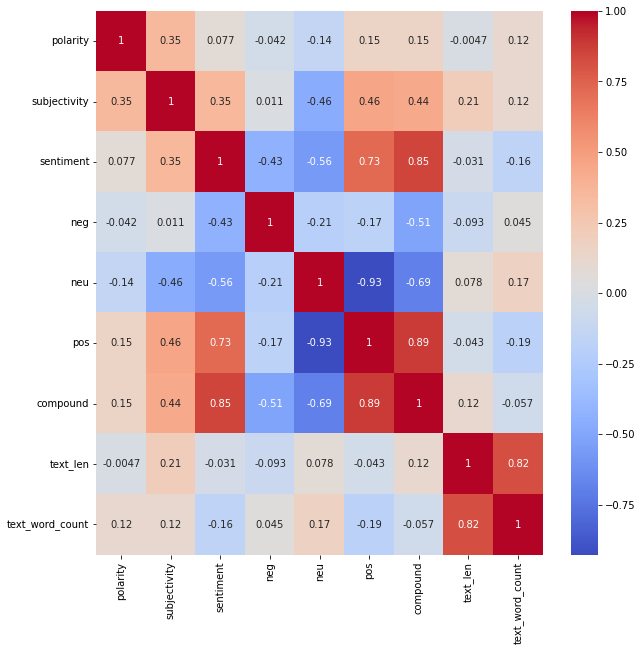

In [ ]:
corr= ds.corr() 
fig, ax= plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True, ax=ax, cmap="coolwarm")

naive bayes with clean tweets and sentiment


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf


In [ ]:
dataset = pd.read_csv('/content/sample_data/_covaxin_dataset_children (1).csv')

In [ ]:
 import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
corpus = []
n = len(dataset['text'])

for i in range(0, n):
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    review = review.lower()
    review = review.split()
    lemm = WordNetLemmatizer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [lemm.lemmatize(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = dataset["sentiment"].values

train data= 80%, test size = 20%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred,y_test)

['positive' 'negative' 'neutral' 'positive' 'positive' 'positive'
 'negative' 'positive' 'positive' 'positive' 'positive' 'negative'
 'positive' 'negative' 'positive' 'positive' 'positive' 'positive'
 'negative' 'neutral' 'positive' 'positive' 'neutral' 'neutral' 'positive'
 'neutral' 'neutral' 'positive' 'neutral' 'positive' 'positive' 'neutral'
 'positive' 'neutral' 'positive' 'positive' 'neutral' 'positive'
 'negative' 'negative' 'positive' 'positive' 'neutral' 'positive'
 'negative' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'negative'
 'positive' 'negative' 'positive' 'positive' 'positive' 'neutral'
 'negative' 'neutral' 'positive' 'positive' 'positive' 'positive'
 'negative' 'neutral' 'positive' 'negative' 'positive' 'positive'
 'positive' 'positive' 'neutral' 'positive' 'negative' 'positive'
 'positive' 'positive' 'neutral' 'positive' 'neutral' 'neutral' 'negative'
 'neutral' 'positive' 'negative' 'neutral' 'pos

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)
print ("accuracy score:",accuracy_score(y_test, y_pred))
print ("accuracy in percentage:",accuracy_score(y_test, y_pred)*100, "%")

cr=classification_report(y_test, y_pred)
print("\nClassification report:\n", cr)


Confusion matrix:
 [[ 39   1   1]
 [  5 120   5]
 [ 40   1 428]]
accuracy score: 0.9171875
accuracy in percentage: 91.71875 %

Classification report:
               precision    recall  f1-score   support

    negative       0.46      0.95      0.62        41
     neutral       0.98      0.92      0.95       130
    positive       0.99      0.91      0.95       469

    accuracy                           0.92       640
   macro avg       0.81      0.93      0.84       640
weighted avg       0.95      0.92      0.93       640



accuracy of Naive bayes is 91.71%

support vector machine

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = ds["clean tweets"]
y= ds["sentiment"]

train data= 80%, test data= 20%

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x , y, test_size = 0.20, random_state = 0)

In [ ]:
documents = ["This is sample test for vectorization ",
             "This is done for twitter sentiment analysis!",
             "for covaxin dataset"]

# initializing the countvectorizer
vectorizer = CountVectorizer()

# tokenize and make the document into a matrix
document_term_matrix = vectorizer.fit_transform(documents)

# check the result
pd.DataFrame(document_term_matrix.toarray(), columns = vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,analysis,covaxin,dataset,done,for,is,sample,sentiment,test,this,twitter,vectorization
0,0,0,0,0,1,1,1,0,1,1,0,1
1,1,0,0,1,1,1,0,1,0,1,1,0
2,0,1,1,0,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [ ]:
from sklearn import svm
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test_vec)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')


Accuracy score for SVC is:  97.65625 %


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion matrix:\n", cm)
print ("accuracy score:",accuracy_score(y_test, y_pred_svm))
print ("accuracy in percentage:",accuracy_score( y_test, y_pred_svm)*100, "%")

cr=classification_report(y_test, y_pred_svm)
print("\nClassification report:\n", cr)

Confusion matrix:
 [[ 37   0   4]
 [  1 127   2]
 [  1   7 461]]
accuracy score: 0.9765625
accuracy in percentage: 97.65625 %

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92        41
           1       0.95      0.98      0.96       130
           2       0.99      0.98      0.99       469

    accuracy                           0.98       640
   macro avg       0.96      0.95      0.96       640
weighted avg       0.98      0.98      0.98       640

